<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/ChannelFlows/FlowRegimes/ChannelFlowRegimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
import subprocess
from scipy.optimize import fsolve

def shellcmd( cmd, verbose=False ):
    out = subprocess.run( cmd, shell=True, capture_output=True, text=True )
    if verbose: print( out.stdout, out.stderr )

In [2]:
import pathlib

if not pathlib.Path("mpl_utils.py").exists():
    shellcmd( "curl -O https://raw.githubusercontent.com/joaochenriques/"
                "ipynb_libs/main/mpl_utils.py" )
import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']

## Flow over a hump

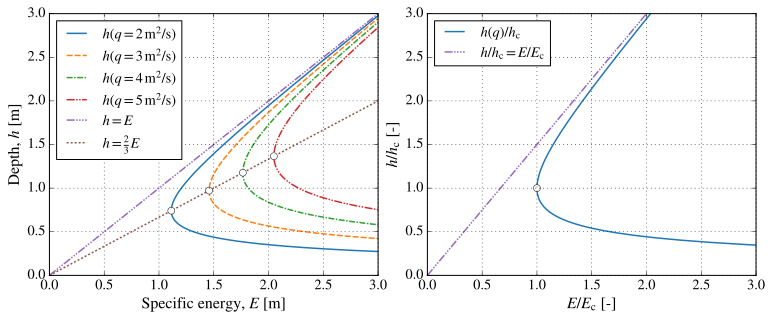

In [41]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

g = 9.81
q_lst = ( 2.0, 3.0, 4.0, 5.0 )

for q in q_lst:
    h = np.linspace( 0.02, 3, 200 )
    E = h + q**2/(2.0*g*h**2)

    ax1.plot( E, h, label='$h(q=%.0f\,$m$^2$/s)' % q )

ax1.plot( (0,3), (0,3), label=r'$h=E$' )
ax1.plot( (0,3), (0,2), label=r'$h=\frac{2}{3}E$' )

for q in q_lst:
    yc = (q**2/g)**(1.0/3.0)
    Ec = 3.0/2.0*yc
    ax1.plot( Ec, yc, 'o', markersize=7, markerfacecolor='w' )

ax1.set_xlim( (0,3) )
ax1.legend(loc='upper left')
ax1.set_xlabel( 'Specific energy, $E$ [m]')
ax1.set_ylabel( 'Depth, $h$ [m]')
ax1.grid()

q = q_lst[0]
yc = (q**2/g)**(1.0/3.0)
Ec = 3.0/2.0*yc

h = np.linspace( 0.02, 4, 200 )
E = ( h + q**2/(2.0*g*h**2) )

ax2.plot( E / Ec, h / yc, label='$h(q)/h_\mathrm{c}$' )

ax2.plot( (0,3/Ec), (0,3/yc), dashes=mut.linestyles[4], color=mut.linecolors[4], label=r'$h/h_\mathrm{c}=E/E_\mathrm{c}$' )
# ax2.plot( (0,6/Ec), (0,4/yc), dashes=mut.linestyles[5], color=mut.linecolors[5], label=r'$h/h_\mathrm{c}=\frac{3}{2}E/E_\mathrm{c}$' )

ax2.plot( 1, 1, 'o', markersize=7, markerfacecolor='w' )

ax2.set_xlim( (0,3) )
ax2.legend(loc='upper left')
ax2.set_xlabel( '$E/E_\mathrm{c}$ [-]')
ax2.set_ylabel( '$h/h_\mathrm{c}$ [-]')

ax2.set_xlim( (0,3) )
ax2.set_ylim( (0,3) )
ax2.grid()

mpl.savefig( 'ChannelFlowOverHump_depth_V0.pdf', bbox_inches='tight', pad_inches=0.02);

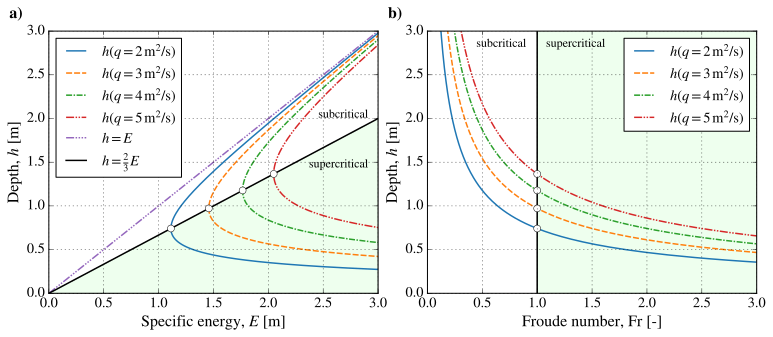

In [4]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

g = 9.81
q_vec = np.array( ( 2.0, 3.0, 4.0, 5.0 ) )

for q in q_vec:
    h = np.linspace( 0.02, 3, 200 )
    E = h + q**2/(2.0*g*h**2)
    F = q / ( np.sqrt( g*h ) * h )

    ax1.plot( E, h, label='$h(q=%.0f\,$m$^2$/s)' % q )
    ax2.plot( F, h, label='$h(q=%.0f\,$m$^2$/s)' % q )

ax1.plot( (0,3), (0,3), label=r'$h=E$' )
ax1.plot( (0,3), (0,2), 'k-', label=r'$h=\frac{2}{3}E$' )
ax2.axvline( 1, color = 'k' )

for q in q_vec:
    yc = (q**2/g)**(1.0/3.0)
    Ec = 3.0/2.0*yc
    ax1.plot( Ec, yc, 'o', markersize=7, markerfacecolor='w' )
    ax2.plot( 1.0, yc, 'o', markersize=7, markerfacecolor='w' )


ax1.fill_between( (0,3), (0,2.0), 0, facecolor = '#AAFFAA', alpha=0.2 )
ax1.text(0.97, 0.67, 'subcritical', transform=ax1.transAxes, horizontalalignment='right' )
ax1.text(0.97, 0.48, 'supercritical', transform=ax1.transAxes, horizontalalignment='right')


ax2.axvspan( 1, 3, facecolor = '#AAFFAA', alpha=0.2 )
ax2.text(0.30, 0.94, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.36, 0.94, 'supercritical', transform=ax2.transAxes)


ax1.set_xlim( (0,3) )
ax1.set_ylim( (0,3) )
ax1.legend(loc='upper left')
ax1.set_xlabel( 'Specific energy, $E$ [m]')
ax1.set_ylabel( 'Depth, $h$ [m]')
ax1.grid()

ax2.set_xlim( (0,3) )
ax2.set_ylim( (0,3) )

ax2.legend(loc='upper right')
ax2.set_xlabel( 'Froude number, Fr [-]')
ax2.set_ylabel( 'Depth, $h$ [m]')
ax2.grid()

ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');

mpl.savefig( 'ChannelFlowOverHump_depth.pdf', bbox_inches='tight', pad_inches=0.02);

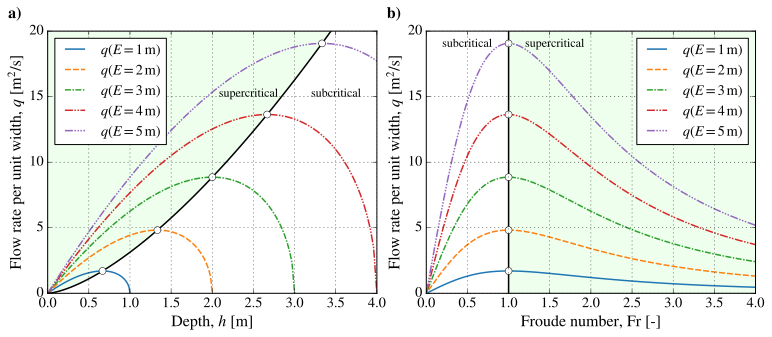

In [5]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

g = 9.81
E_vec = np.array( ( 1.0, 2.0, 3.0, 4.0, 5.0 ) )

for E in E_vec:
    h = np.linspace( 0.00001, E, 100 )
    q = np.sqrt( 2.0*g*h**2*(E-h) )
    F = q / ( np.sqrt( g*h ) * h )

    ax1.plot( h, q, label='$q(E=%.0f\,$m$)$' % E )
    ax2.plot( F, q, label='$q(E=%.0f\,$m$)$' % E )

E_vec2 = np.linspace( 0.0001, 7.0, 100 )
hc2 = 2.0/3.0*E_vec2
qc2 = np.sqrt( g*hc2 ) * hc2

ax1.fill_between(hc2, 20, qc2, facecolor = '#AAFFAA', alpha=0.2 )
ax1.plot( hc2, qc2, 'k-' )

hc = 2.0/3.0*E_vec
qc = np.sqrt( g*hc ) * hc
ax1.plot( hc, qc, 'o', markersize=7, markerfacecolor='w' )
ax1.text(0.7, 0.75, 'supercritical', transform=ax1.transAxes, horizontalalignment='right' )
ax1.text(0.8, 0.75, 'subcritical', transform=ax1.transAxes)


ax2.axvline( 1, color = 'k' )
ax2.axvspan( 1, 4, facecolor = '#AAFFAA', alpha=0.2 )
Fc = qc / ( np.sqrt( g*hc ) * hc )
ax2.plot( Fc, qc, 'o', markersize=7, markerfacecolor='w' )
ax2.text(0.2, 0.94, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.3, 0.94, 'supercritical', transform=ax2.transAxes)


ax1.set_xlim( (0,4) )
ax1.set_ylim( (0,20) )

ax1.legend(loc='upper left')
ax1.set_xlabel( 'Depth, $h$ [m]')
ax1.set_ylabel( 'Flow rate per unit width, $q$ [m$^2$/s]')
ax1.grid()

ax2.set_xlim( (0,4) )
ax2.set_ylim( (0,20) )

ax2.legend(loc='upper right')
ax2.set_xlabel( 'Froude number, Fr [-]')
ax2.set_ylabel( 'Flow rate per unit width, $q$ [m$^2$/s]')
ax2.grid()

ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');

mpl.savefig( 'ChannelFlowOverHump_flowRate.pdf', bbox_inches='tight', pad_inches=0.02);

In [6]:
def depths( E_spec, q_spec, h_0 ):
    def func( h, E_spec, q_spec):
        g = 9.81
        return ( E_spec - q_spec**2 / (2*g*h**2) - h )

    h, _, ier, _ = fsolve(func, x0=h_0, args=(E_spec,q_spec), full_output=True, xtol=1e-8)
    return h[0]

In [7]:
def draw_arrow( arr_start, arr_end):
       dx = arr_end[0] - arr_start[0]
       dy = arr_end[1] - arr_start[1]
       mpl.arrow( arr_start[0], arr_start[1], dx, dy,
                    linewidth=1., head_width=0.2, head_length=0.1,
                    length_includes_head=True,color='k',
                    zorder=10 )

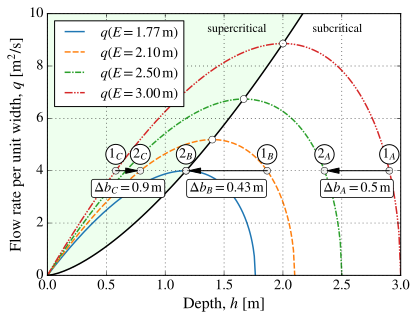

In [8]:
fig = mpl.figure()
fig.subplots_adjust( wspace = 0.15 )

fontsz = 14
g = 9.81
E_vec = np.array( ( 1.76566, 2.1, 2.5, 3.0 ) )

for E in E_vec:
    h = np.linspace( 0.0001, E, 200 )
    q = np.sqrt( 2.0*g*h**2*(E-h) )
    F = q / ( np.sqrt( g*h ) * h )

    mpl.plot( h, q, label='$q(E=%.2f\,$m$)$' % E )

E_vec2 = np.linspace( 0.0, 7.0, 100 )
hc2 = 2.0/3.0*E_vec2
qc2 = np.sqrt( g*hc2 ) * hc2

mpl.fill_between(hc2, 20, qc2, facecolor = '#AAFFAA', alpha=0.2 )
mpl.plot( hc2, qc2, 'k-' )

hc = 2.0/3.0*E_vec
qc = np.sqrt( g*hc ) * hc
mpl.plot( hc, qc, 'o', markersize=7, markerfacecolor='w' )
mpl.gca().text(0.62, 0.93, 'supercritical', transform=mpl.gca().transAxes,
               horizontalalignment='right' )
mpl.gca().text(0.75, 0.93, 'subcritical', transform=mpl.gca().transAxes)

#===============================================================================
hsub = depths( 3.0, 4, 2.9 )
hsup = depths( 2.5, 4, 2.4 )
mpl.plot( ( hsup, hsub ), ( 4, 4), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow( np.array( (hsub,4.0) ), np.array( (hsup*1.01,4.0) ) )
mpl.text( (hsub+hsup)*0.5+0.0, 3.2, '$\Delta b_{A}=0.5\,$m', fontsize=fontsz,
         horizontalalignment='center',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

mpl.text( hsub, 4.5, '$1_A$', color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( hsup, 4.5, '$2_A$', color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

#===============================================================================
hsub = depths( 2.1, 4, 2.9 )
hsup = depths( 1.76566, 4, 1.0 )
mpl.plot( (hsup, hsub), (4,4), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow( np.array( (hsub,4.0) ), np.array( (hsup*1.02,4.0) ) )
mpl.text( (hsub+hsup)*0.5, 3.2, "$\Delta b_{B}=0.43\,$m", fontsize=fontsz,
         horizontalalignment='center',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

mpl.text( hsub, 4.5, "$1_B$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( hsup, 4.5, "$2_B$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

#===============================================================================
qC = 4.0
hsub = depths( 3.0, qC, 0.5 )
hsup = depths( 2.1, qC, 0.5 )
mpl.plot( (hsup, hsub), (qC,qC), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow( np.array( (hsub,qC) ), np.array( (hsup*0.97,qC) ) )
mpl.text( (hsub+hsup)*0.5, 3.2, "$\Delta b_{C}=0.9\,$m", fontsize=fontsz,
         horizontalalignment='center',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

mpl.text( hsub, qC+0.5, "$1_C$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( hsup, qC+0.5, "$2_C$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

#===============================================================================
mpl.xlim( (0,3) )
mpl.ylim( (0,10) )

mpl.legend(loc='upper left')
mpl.xlabel( 'Depth, $h$ [m]')
mpl.ylabel( 'Flow rate per unit width, $q$ [m$^2$/s]')
mpl.grid()

mpl.savefig( 'ChannelFlowOverHump_solutions.pdf', bbox_inches='tight', pad_inches=0.02);

In [9]:
def draw_arrow2( arr_start, arr_end):
       dx = arr_end[0] - arr_start[0]
       dy = arr_end[1] - arr_start[1]
       mpl.arrow( arr_start[0], arr_start[1], dx, dy,
                    linewidth=1., head_width=0.05, head_length=0.1,
                    length_includes_head=True,color='k',
                    zorder=10 )

In [10]:
import pylab

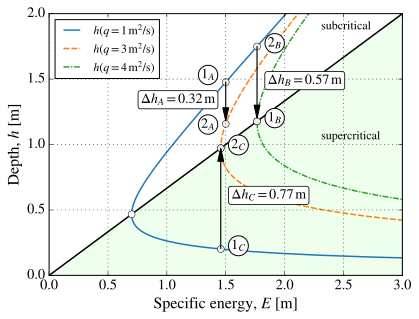

In [11]:
fig = mpl.figure()
fig.subplots_adjust( wspace = 0.15 )

g = 9.81
q_vec = np.array( ( 1.0, 3.0, 4.0 ) )

for q in q_vec:
    h = np.linspace( 0.02, 3, 200 )
    E = h + q**2/(2.0*g*h**2)
    F = q / ( np.sqrt( g*h ) * h )

    mpl.plot( E, h, label='$h(q=%.0f\,$m$^2$/s)' % q )

mpl.plot( (0,3), (0,2), 'k-' )

for q in q_vec:
    yc = (q**2/g)**(1.0/3.0)
    Ec = 3.0/2.0*yc
    mpl.plot( Ec, yc, 'o', markersize=7, markerfacecolor='w' )


mpl.fill_between( (0,3), (0,2.0), 0, facecolor = '#AAFFAA', alpha=0.2 )
mpl.text(0.77, 0.94, 'subcritical', transform=mpl.gca().transAxes, horizontalalignment='left' )
mpl.text(0.77, 0.52, 'supercritical', transform=mpl.gca().transAxes, horizontalalignment='left')

#===============================================================================
EA = 1.5
hA1 = depths( E_spec=EA, q_spec=1, h_0=1.5 )
hA2 = depths( E_spec=EA, q_spec=3, h_0=1.5 )

mpl.plot( (EA,EA), (hA1, hA2), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow2( np.array( (EA,hA1) ), np.array( (EA,hA2*1.02) ) )

mpl.text( EA-0.15, hA1+0.03, "$1_A$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( EA-0.15, hA2-0.03, "$2_A$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

mpl.text( EA-0.09, (hA1+hA2)*0.5, "$\Delta h_{A}=%.2f\,$m" % (hA1-hA2), fontsize=fontsz,
         horizontalalignment='right',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

#===============================================================================
q1 = 4
hc1 = (q1/np.sqrt(g))**(2.0/3.0)
E1 = 3.0/2.0 * hc1

q2 = 1
h2 = depths( E_spec=E1, q_spec=q2, h_0=2.5 )

mpl.plot( (E1,E1), (hc1, h2), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow2( np.array( (E1,h2) ), np.array( (E1,hc1*1.02) ) )

mpl.text( E1+0.15, hc1, "$1_B$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( E1+0.15, h2, "$2_B$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

mpl.text( E1+0.09, (hc1+h2)*0.5, "$\Delta h_{B}=%.2f\,$m" % (h2-hc1), fontsize=fontsz,
         horizontalalignment='left',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

#===============================================================================
q1 = 3
hc1 = (q1/np.sqrt(g))**(2.0/3.0)
E1 = 3.0/2.0 * hc1

q2 = 1
h2 = depths( E_spec=E1, q_spec=q2, h_0=0.1 )

mpl.plot( (E1,E1), (hc1, h2), 'o', markersize=7, markerfacecolor='#f0f0f0' )
draw_arrow2( np.array( (E1,h2*1.02) ), np.array( (E1,hc1) ) )

mpl.text( E1+0.15, hc1, "$2_C$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )
mpl.text( E1+0.15, h2, "$1_C$", color='k', fontsize=fontsz,
            verticalalignment='baseline', horizontalalignment='center',
            bbox=dict(facecolor='1', edgecolor='k', boxstyle='circle,pad=0.2') )

mpl.text( E1+0.09, (hc1+h2)*0.5, "$\Delta h_{C}=%.2f\,$m" % (hc1-h2), fontsize=fontsz,
         horizontalalignment='left',
         bbox=dict(facecolor='1', linewidth=0.8, edgecolor=None, boxstyle='round,pad=0.2'))

#===============================================================================
mpl.xlim( (0,3) )
mpl.ylim( (0,2) )
mpl.legend(loc='upper left', fontsize=12)
mpl.xlabel( 'Specific energy, $E$ [m]')
mpl.ylabel( 'Depth, $h$ [m]')
mpl.grid()

mpl.savefig( 'ChannelFlowConstriction_solutions.pdf', bbox_inches='tight', pad_inches=0.02);

In [12]:
hA2, hA1

(1.157806916631796, 1.4766245028926304)

In [13]:
def func_Δβ( ζ2, Fr1 ):
  return 0.5*Fr1**2*(1-1/ζ2**2) + (1-ζ2)

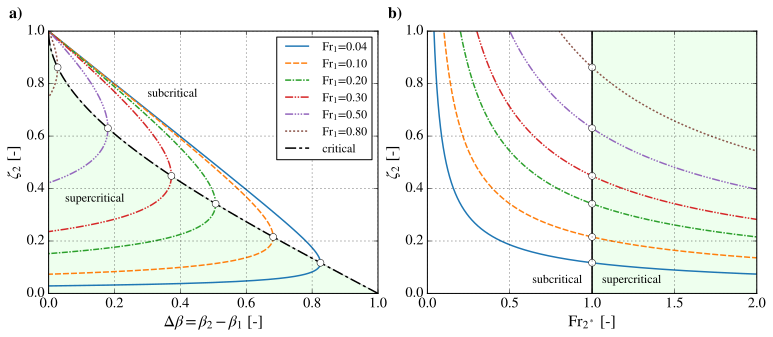

In [14]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

Fr = np.array( ( 0.04, 0.1, 0.2, 0.3, 0.5, 0.8 ) )

Fr_c = np.linspace( 0.0, 1.0, 100 )
ζ2 = np.linspace( .02, 1.0, 1000 )

for Fr1 in Fr:
  Δβ = func_Δβ( ζ2, Fr1 )
  Fr2 = Fr1 / ζ2
  ax1.plot( Δβ, ζ2, label='Fr$_1$=%.2f' % Fr1 )
  ax2.plot( Fr2/np.sqrt(ζ2), ζ2, label='Fr$_1$=%.2f' % Fr1 )


ζ2_cc = Fr_c**(2/3)
Δβ_cc  = Fr_c**2/2.0+1-3.0/2.0*Fr_c**(2.0/3.0)

ζ2_c = Fr**(2/3)
Δβ_c  = Fr**2/2.0+1-3.0/2.0*Fr**(2.0/3.0)

ax1.plot( Δβ_cc, ζ2_cc, 'k', label='critical' )
ax1.plot( Δβ_c, ζ2_c, 'o', markersize=7, markerfacecolor='w' )

ax1.set_xlabel( r'$\Delta\beta = \beta_2-\beta_1$ [-]' )
ax1.set_ylabel( r'$\zeta_2$ [-]' )
ax1.set_xlim( (0,1) )
ax1.legend(fontsize=12,handlelength=2.6)
ax1.fill_between(Δβ_cc, 0, ζ2_cc, facecolor = '#AAFFAA', alpha=0.2 )
ax1.grid()
ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax1.text(0.3, 0.75, 'subcritical', transform=ax1.transAxes)
ax1.text(0.05, 0.35, 'supercritical', transform=ax1.transAxes)

ax2.axvline(1,color='k', label='critical' )
ax2.plot( np.ones( Δβ_c.shape ), ζ2_c, 'o', markersize=7, markerfacecolor='w' )
ax2.set_xlabel( '$\mathrm{Fr}_{2^*}$ [-]' )
ax2.set_ylabel( '$\zeta_2$ [-]' )
ax2.set_xlim( (0,2) )
ax2.axvspan( 1, 2, facecolor = '#AAFFAA', alpha=0.2 )
ax2.grid()
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');
ax2.text(0.47, 0.04, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.53, 0.04, 'supercritical', transform=ax2.transAxes)

mpl.savefig( 'ChannelFlowOverHump_zeta_2.pdf', bbox_inches='tight', pad_inches=0.02);

## Flow through a constriction

In [15]:
def func_B( ζ2, Fr1 ):
  return Fr1 / ( ζ2 * np.sqrt( Fr1**2 + 2.0*(1.0-ζ2) ) )

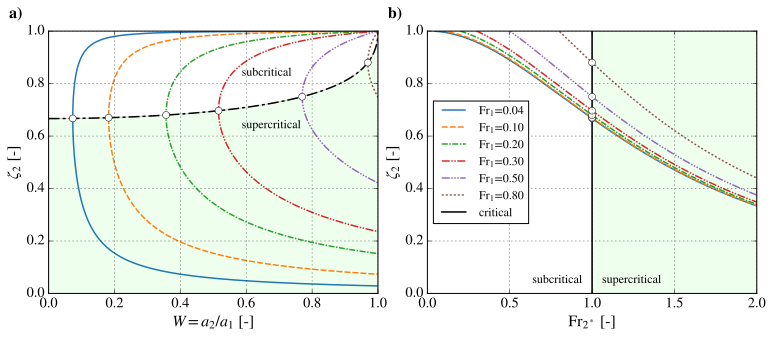

In [16]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.15 )

Fr = np.array( ( 0.04, 0.1, 0.2, 0.3, 0.5, 0.8 ) )

Fr_c = np.linspace( 0.0, 1.0, 100 )
ζ2 = np.linspace( .02, 1.0, 1000 )

for Fr1 in Fr:
  B = func_B( ζ2, Fr1 )
  Fr2 = Fr1 / ( B * ζ2 )
  ax1.plot( B, ζ2, label='Fr$_1$=%.2f' % Fr1 )
  ax2.plot( Fr2/np.sqrt(ζ2), ζ2, label='Fr$_1$=%.2f' % Fr1 )

ζ2_cc = 1.0/3.0 *(2.0 + Fr_c**2)
B_cc  = 3.0 * np.sqrt(3) * Fr_c / ( 2.0 + Fr_c**2 )**(3.0/2.0)

ζ2_c = 1.0/3.0 *(2.0 + Fr**2)
B_c  = 3.0 * np.sqrt(3) * Fr / ( 2.0 + Fr**2 )**(3.0/2.0)

ax1.plot( B_cc, ζ2_cc, 'k', label='critical' )
ax1.plot( B_c, ζ2_c, 'o', markersize=7, markerfacecolor='w' )

ax1.set_xlabel( '$W=a_2/a_1$ [-]' )
ax1.set_ylabel( '$\zeta_2$ [-]' )
ax1.set_xlim( (0,1) )
ax1.fill_between(B_cc, 0, ζ2_cc, facecolor = '#AAFFAA', alpha=0.2 )
ax1.grid()
ax1.text(-0.12, 1.05, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
ax1.text(0.586, 0.83, 'subcritical', transform=ax1.transAxes)
ax1.text(0.586, 0.63, 'supercritical', transform=ax1.transAxes)

ax2.axvline(1,color='k', label='critical' )
ax2.plot( np.ones( B_c.shape ), ζ2_c, 'o', markersize=7, markerfacecolor='w' )
ax2.set_xlabel( '$\mathrm{Fr}_{2^*}$ [-]' )
ax2.set_ylabel( '$\zeta_2$ [-]' )
ax2.set_xlim( (0,2) )
ax2.legend(loc='center left', fontsize=12,handlelength=2.6)
ax2.axvspan( 1, 2, facecolor = '#AAFFAA', alpha=0.2 )
ax2.grid()
ax2.text(-0.12, 1.05, 'b)', transform=ax2.transAxes, size=16, weight='semibold');
ax2.text(0.47, 0.04, 'subcritical', transform=ax2.transAxes, horizontalalignment='right' )
ax2.text(0.53, 0.04, 'supercritical', transform=ax2.transAxes)

mpl.savefig( 'ChannelFlowThroughConstriction_zeta_2.pdf', bbox_inches='tight', pad_inches=0.02);

## Flow in a flat constant width channel with an applied force

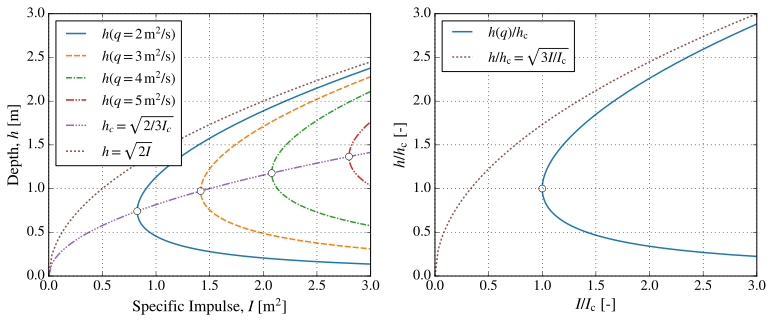

In [54]:
fig, (ax1, ax2) = mpl.subplots(1,2, figsize=(12, 4.5) )
fig.subplots_adjust( wspace = 0.2 )

g = 9.81
q_lst = ( 2.0, 3.0, 4.0, 5.0 )

for q in q_lst:
    h = np.linspace( 0.02, 3, 200 )
    I = 0.5*h**2 + q**2/(g*h)

    ax1.plot( I, h, label='$h(q=%.0f\,$m$^2$/s)' % q )

Ic_vec = np.linspace( 0.0, 3.0, 100 )
yc_vec = (2.0/3.0*Ic_vec)**0.5

ax1.plot( Ic_vec, yc_vec, label=r'$h_c=\sqrt{2/3 I_c}$' )
ax1.plot( Ic_vec, (2.0*Ic_vec)**0.5, label=r'$h=\sqrt{2 I}$' )

for q in q_lst:
    yc = (q**2/g)**(1.0/3.0)
    Ic = 3.0/2.0*yc**2
    ax1.plot( Ic, yc, 'o', markersize=7, markerfacecolor='w' )


ax1.set_xlim( (0,3) )
ax1.legend(loc='upper left')
ax1.set_xlabel( 'Specific Impulse, $I$ [m$^2$]')
ax1.set_ylabel( 'Depth, $h$ [m]')
ax1.grid()

q = q_lst[0]
yc = (q**2/g)**(1.0/3.0)
Ic = 3.0/2.0*yc**2

h = np.linspace( 0.02, 4, 200 )
I = ( 0.5*h**2 + q**2/(g*h) )

ax2.plot( I / Ic, h / yc, label='$h(q)/h_\mathrm{c}$' )

Ic_vec = np.linspace( 0.0, 3.0, 100 )
yc_vec = (3*Ic_vec)**0.5

ax2.plot( Ic_vec, yc_vec, dashes=mut.linestyles[5], color=mut.linecolors[5], label=r'$h/h_\mathrm{c}=\sqrt{3I/I_\mathrm{c}}$' )

ax2.plot( 1, 1, 'o', markersize=7, markerfacecolor='w' )

ax2.set_xlim( (0,3) )
ax2.legend(loc='upper left')
ax2.set_xlabel( '$I/I_\mathrm{c}$ [-]')
ax2.set_ylabel( '$h/h_\mathrm{c}$ [-]')

ax2.set_xlim( (0,3) )
ax2.set_ylim( (0,3) )
ax2.grid()

mpl.savefig( 'ChannelFlow_Force.pdf', bbox_inches='tight', pad_inches=0.02);

In [18]:
!zip plots.zip *.pdf

  adding: ChannelFlowConstriction_solutions.pdf (deflated 28%)
  adding: ChannelFlowOverHump_depth.pdf (deflated 27%)
  adding: ChannelFlowOverHump_depth_V0.pdf (deflated 25%)
  adding: ChannelFlowOverHump_flowRate.pdf (deflated 24%)
  adding: ChannelFlowOverHump_solutions.pdf (deflated 26%)
  adding: ChannelFlowOverHump_zeta_2.pdf (deflated 26%)
  adding: ChannelFlowThroughConstriction_zeta_2.pdf (deflated 25%)
